In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)



Abrimos el archivo

In [107]:
df = pd.read_pickle('../datos/02-bikes-limpio-con-outliers.pickle')

In [108]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [109]:
df_r = df.drop(["cnt","instant","registered"], axis=1)

In [110]:
df_r.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331
1,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131


### Test de normalidad Variable Respuesta (ASUNCIÓN DE NORMALIDAD)

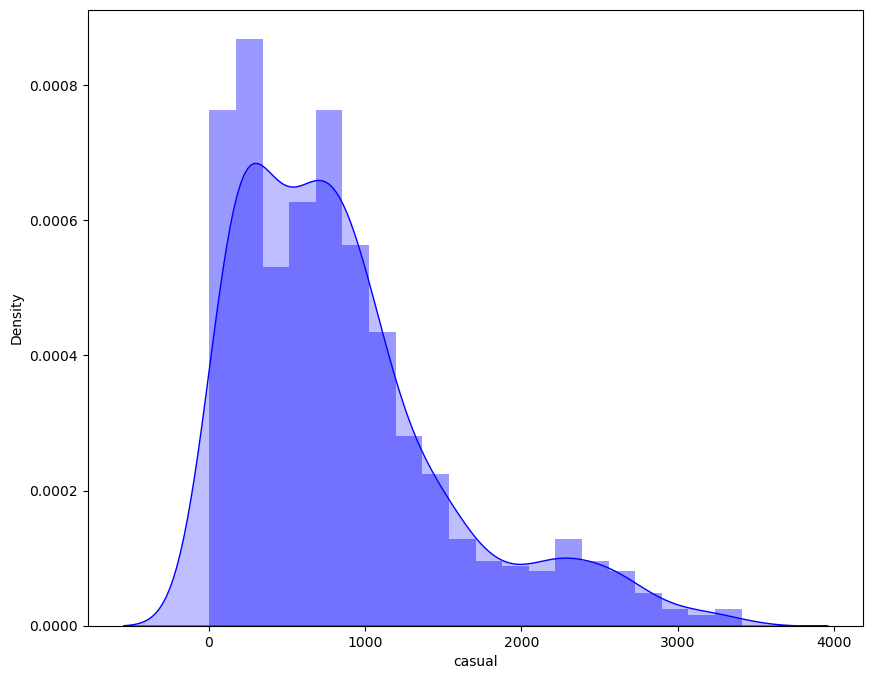

In [111]:
sns.distplot(
    df_r["casual"], 
    #hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [112]:
pd.DataFrame(df_r.isnull().sum())

,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [113]:
stats.shapiro(df_r["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

Viendo el resultado que nos da el test Shapiro en nuestra variable respuesta, vemos que el valor que presenta es menor que 0.05, por tanto debemos rechazar la hipotesis nula, es decir, nuestros datos NO SON NORMALES!

---

### ASUNCIÓN DE INDEPENDENCIA

In [114]:
df_r_numericas = df_r.select_dtypes(include=np.number)

In [115]:
df_r_numericas.head(2)

,yr,mnth,temp,atemp,hum,windspeed,casual
0,0,1,14.110847,18.18125,80.5833,10.749882,331
1,0,1,14.902598,17.68695,69.6087,16.652113,131


In [116]:
df_r_continuas = pd.DataFrame(df_r[["temp", "atemp", "hum", "windspeed"]])

In [117]:
df_r_continuas.head(2)

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113


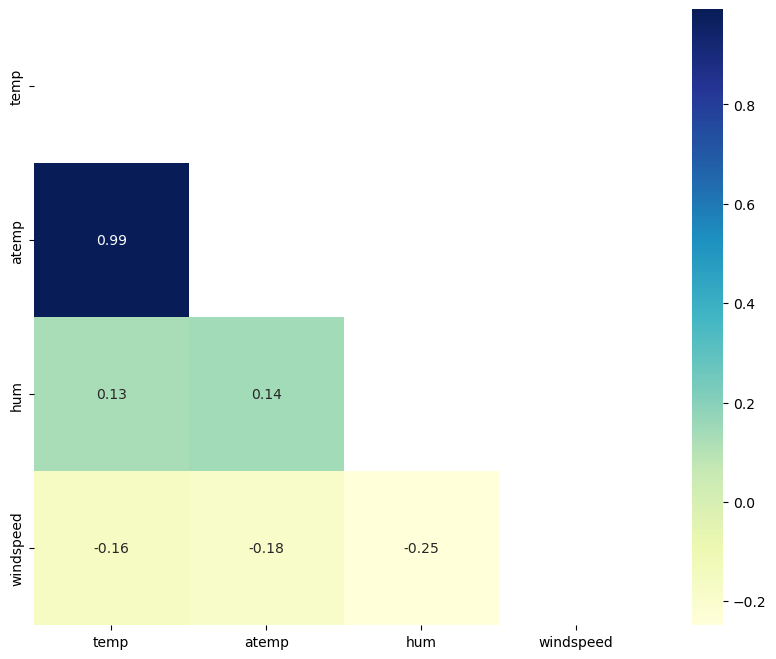

In [118]:
mask = np.triu(np.ones_like(df_r_continuas.corr(), dtype=np.bool))

sns.heatmap(df_r_continuas.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

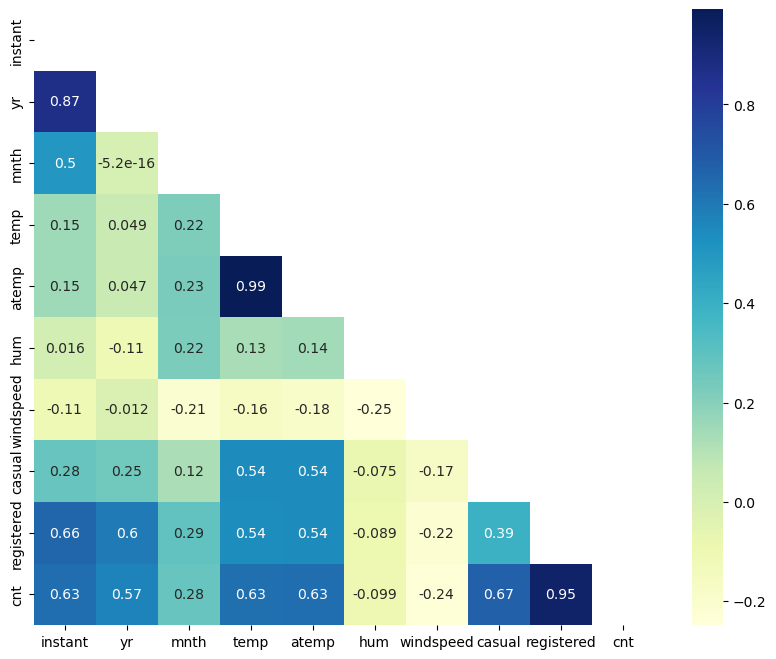

In [119]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), # calculamos la correlación. En este caso, como no estamos especificando nada la correlación será la de Pearson.
            cmap = "YlGnBu", # para especoficar el color del mapa
           annot = True, 
           mask = mask); # para sacar el valor de la correlación

In [120]:
predictoras = df_r.columns.drop("casual")
predictoras

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [121]:
df_r.head(2)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual
0,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331
1,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131


In [122]:
from itertools import combinations
# size of combination is set to 3
combinaciones = list(combinations(predictoras, 2))
print(combinaciones)
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_r[i[0]], df_r[i[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f"INDEPENDENCIA ENTRE {i[0], i[1]} \n", test_results)
    print("........................")

[('dteday', 'season'), ('dteday', 'yr'), ('dteday', 'mnth'), ('dteday', 'holiday'), ('dteday', 'weekday'), ('dteday', 'workingday'), ('dteday', 'weathersit'), ('dteday', 'temp'), ('dteday', 'atemp'), ('dteday', 'hum'), ('dteday', 'windspeed'), ('season', 'yr'), ('season', 'mnth'), ('season', 'holiday'), ('season', 'weekday'), ('season', 'workingday'), ('season', 'weathersit'), ('season', 'temp'), ('season', 'atemp'), ('season', 'hum'), ('season', 'windspeed'), ('yr', 'mnth'), ('yr', 'holiday'), ('yr', 'weekday'), ('yr', 'workingday'), ('yr', 'weathersit'), ('yr', 'temp'), ('yr', 'atemp'), ('yr', 'hum'), ('yr', 'windspeed'), ('mnth', 'holiday'), ('mnth', 'weekday'), ('mnth', 'workingday'), ('mnth', 'weathersit'), ('mnth', 'temp'), ('mnth', 'atemp'), ('mnth', 'hum'), ('mnth', 'windspeed'), ('holiday', 'weekday'), ('holiday', 'workingday'), ('holiday', 'weathersit'), ('holiday', 'temp'), ('holiday', 'atemp'), ('holiday', 'hum'), ('holiday', 'windspeed'), ('weekday', 'workingday'), ('weekd

---

ASUNCIÓN DE HOMOCEDASTICIDAD

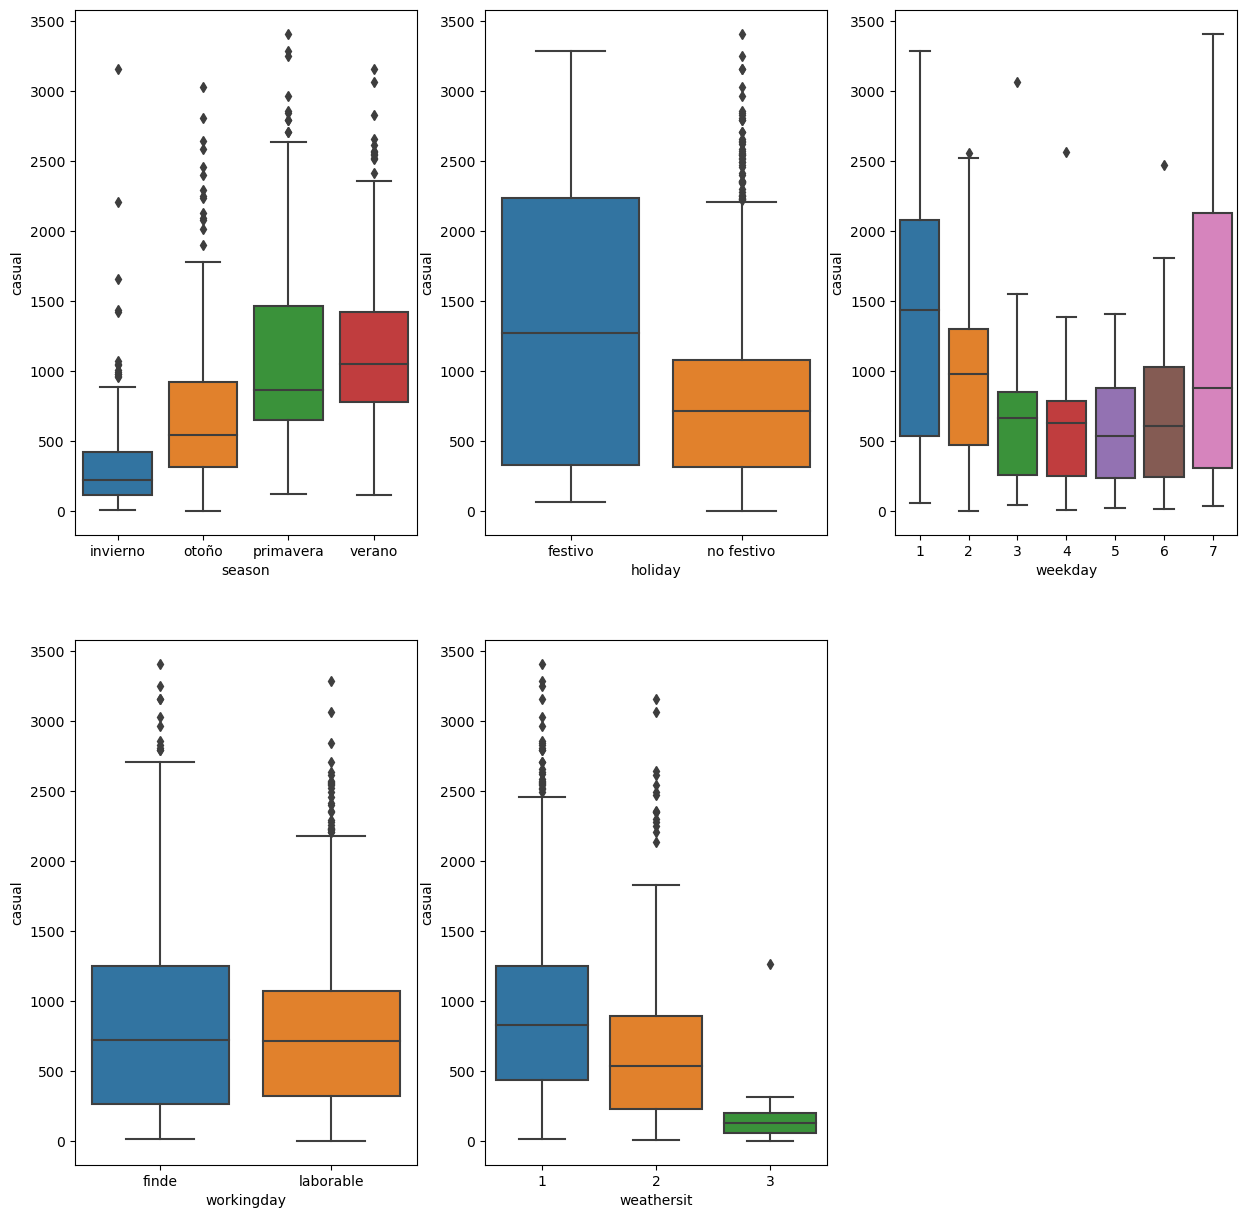

In [123]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))

axes = axes.flat

columnas_cat = df_r.select_dtypes(include = ["category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'casual',
    data    = df_r,
    palette = 'tab10',
    ax      = axes[i]
    );

fig.delaxes(axes[-1])


In [124]:
df_r.describe(include="category").T

,count,unique,top,freq
season,730,4,verano,188
holiday,730,2,no festivo,709
weekday,730,7,1,105
workingday,730,2,laborable,522
weathersit,730,3,1,463


In [125]:
def datos_test_levene(columna, df):
    valores = df[columna].unique()
    d = {}
    for x in valores:
        d["{0}".format(x)] = df[df[columna] == x]["casual"]
    return d
season = datos_test_levene("season", df_r)
holiday = datos_test_levene("holiday", df_r)
workingday = datos_test_levene("workingday", df_r)

In [126]:
levene_season = stats.levene(season['invierno'], season['primavera'],season['verano'],season['otoño'], center='median')
levene_season

LeveneResult(statistic=14.648752415833686, pvalue=2.8542455250698467e-09)

In [127]:
levene_holiday = stats.levene(holiday['festivo'], holiday['no festivo'], center='median')
levene_holiday

LeveneResult(statistic=20.804422533005173, pvalue=5.967339801738605e-06)

In [128]:
levene_workingday = stats.levene(workingday['laborable'], workingday['finde'], center='median')
levene_workingday

LeveneResult(statistic=9.05086303601032, pvalue=0.0027162547312653985)

---

`Consultamos y definimos eliminarla del analisis.`

In [129]:
df_r_continuas.head(2)

,temp,atemp,hum,windspeed
0,14.110847,18.18125,80.5833,10.749882
1,14.902598,17.68695,69.6087,16.652113


In [130]:
numericas= df.select_dtypes(np.number)

In [131]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}
# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df_r.select_dtypes(include = np.number).drop("casual", axis = 1).columns
#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df_r[col], df_r.casual, center='median')
    # lo almacenamos en el charges
    resultados[col] = p_val


In [132]:
resultados

{'yr': 3.16613979225668e-141,
 'mnth': 4.0777022810431975e-140,
 'temp': 1.5499266458859592e-138,
 'atemp': 2.5624550307428922e-138,
 'hum': 3.005457909292799e-136,
 'windspeed': 1.2474027143326703e-139}

Todas las columnas numericas son heterocedasticas.

---

NORMALIZAR VARIABLE RESPUESTA

In [133]:
df_r.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual'],
      dtype='object')

In [134]:
df_r["casual_box"], lambda_ajustada = stats.boxcox(df_r["casual"])


In [135]:
lambda_ajustada

0.31221364474658037

In [136]:
stats.shapiro(df_r["casual_box"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

---

In [137]:
df_r["casual_raiz"] = df_r["casual"].apply(lambda x: math.sqrt(x))

In [138]:
stats.shapiro(df_r["casual_raiz"])

ShapiroResult(statistic=0.9811134338378906, pvalue=4.261200459154679e-08)

---

In [139]:
numericas= df_r.select_dtypes(np.number)

In [140]:
minmax= MinMaxScaler()

In [141]:
minmax.fit(df_r[["casual"]])

MinMaxScaler()

In [142]:
X_normalizadas = minmax.transform(df[["casual"]])

In [143]:

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["casual"])
numericas_minmax.head(2)

,casual
0,0.096538
1,0.037852


In [144]:
stats.shapiro(numericas_minmax["casual"])

ShapiroResult(statistic=0.8850969076156616, pvalue=7.660317123860226e-23)

In [145]:
df_r["casual_minmax"] = numericas_minmax

In [146]:
stats.shapiro(df_r["casual_minmax"])

ShapiroResult(statistic=0.8850969076156616, pvalue=7.660317123860226e-23)

In [147]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,casual_box,casual_raiz,casual_minmax
0,2018-01-01,invierno,0,1,festivo,1,laborable,2,14.110847,18.18125,80.5833,10.749882,331,16.397820,18.193405,0.096538
1,2018-01-02,invierno,0,1,no festivo,2,laborable,2,14.902598,17.68695,69.6087,16.652113,131,11.472437,11.445523,0.037852
2,2018-01-03,invierno,0,1,no festivo,3,laborable,1,8.050924,9.47025,43.7273,16.636703,120,11.076035,10.954451,0.034624
3,2018-01-04,invierno,0,1,no festivo,4,laborable,1,8.200000,10.60610,59.0435,10.739832,108,10.613970,10.392305,0.031103
4,2018-01-05,invierno,0,1,no festivo,5,laborable,1,9.305237,11.46350,43.6957,12.522300,82,9.475537,9.055385,0.023474


---

### Vamos a proceder a realizar el encoding.

In [148]:
df_r.drop(["casual_box","casual_raiz", "casual_minmax",'workingday','temp'], axis=1,inplace=True)


In [149]:
df_r.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,atemp,hum,windspeed,casual
0,2018-01-01,invierno,0,1,festivo,1,2,18.18125,80.5833,10.749882,331
1,2018-01-02,invierno,0,1,no festivo,2,2,17.68695,69.6087,16.652113,131
2,2018-01-03,invierno,0,1,no festivo,3,1,9.47025,43.7273,16.636703,120
3,2018-01-04,invierno,0,1,no festivo,4,1,10.60610,59.0435,10.739832,108
4,2018-01-05,invierno,0,1,no festivo,5,1,11.46350,43.6957,12.522300,82


In [150]:
df_r.to_csv("../datos/casual/13_casual-no-norm.csv")# datos no normalizados

In [151]:
df_r.to_pickle("../datos/casual/13_casual-no-norm.pickle")# datos no normalizados